# Regression

### Blue Bikes Rental Data

Lets start with importing what we need...

In [10]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import datasets

Lets read in the data into a Pandas 'dataframe'. We'll see that this is a nifty datastruture. We'll take a look at the data frame shortly.

In [18]:
url = "https://docs.google.com/spreadsheets/d/1rgHhBRqSZG5sfAMbbEVP2-IA0tAw7PftO6JLmJL4dY0/export?format=csv&id=1rgHhBRqSZG5sfAMbbEVP2-IA0tAw7PftO6JLmJL4dY0&gid=713155364"

df = pd.read_csv(url)

In [20]:
df.info

<bound method DataFrame.info of       rentals  month  day  hour day_of_week  weekend  temp  temp_wb  \
0           4      1    1     0         Mon        0     2        0   
1           6      1    1     1         Mon        0     1        0   
2           6      1    1     2         Mon        0     1       -1   
3           1      1    1     5         Mon        0     0       -2   
4           3      1    1     6         Mon        0     0       -2   
...       ...    ...  ...   ...         ...      ...   ...      ...   
8598       36     12   31    19         Mon        0    39       36   
8599       25     12   31    20         Mon        0    38       36   
8600       13     12   31    21         Mon        0    37       36   
8601        6     12   31    22         Mon        0    38       37   
8602        7     12   31    23         Mon        0    39       38   

      rel_humidity  windspeed  precipitation  
0               59         16           0.00  
1               59   

In [21]:
df.head()

,rentals,month,day,hour,day_of_week,weekend,temp,temp_wb,rel_humidity,windspeed,precipitation
0,4,1,1,0,Mon,0,2,0,59,16,0.0
1,6,1,1,1,Mon,0,1,0,59,11,0.0
2,6,1,1,2,Mon,0,1,-1,54,21,0.0
3,1,1,1,5,Mon,0,0,-2,54,18,0.0
4,3,1,1,6,Mon,0,0,-2,54,15,0.0


In [22]:
df.tail(6)

,rentals,month,day,hour,day_of_week,weekend,temp,temp_wb,rel_humidity,windspeed,precipitation
8597,69,12,31,18,Mon,0,42,37,60,10,0.00
8598,36,12,31,19,Mon,0,39,36,76,13,0.02
8599,25,12,31,20,Mon,0,38,36,86,14,0.04
8600,13,12,31,21,Mon,0,37,36,89,15,0.07
8601,6,12,31,22,Mon,0,38,37,89,14,0.09
8602,7,12,31,23,Mon,0,39,38,89,17,0.19


Looking at the data, its clear that things like 'day_of_week' or 'day' are not truly numerical (in the sense of a temperature or a price) but rather categorical. So we go ahead an declare those columns of the dataframe as such.

In [23]:
categorical_variables = ["month", "day", "hour", "day_of_week", "weekend"]
df[categorical_variables] = df[categorical_variables].astype("category")

In [24]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 8603   │ │ int64       │ 5     │ │ month                 │                                │
│ │ Number of columns │ 11     │ │ category    │ 5     │ │ day                   │                                │
│ └───────────────────┴────────┘ │ float64     │ 1     │ │ hour                  │                                │
│                                └─────────────┴───────┘ │ day_of_week           │                                │
│                                                        │ weekend               │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column             ┃ NA   ┃ NA %   ┃ mean       ┃ sd         ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ rentals            │    0 │      0 │      205.1 │      227.1 │   1 │    32 │  120 │  306 │  1299 │   ▇▃▁   │  │
│ │ temp               │    0 │      0 │      53.21 │      18.29 │  -2 │    38 │   52 │   69 │    97 │  ▂▇▆▇▂  │  │
│ │ temp_wb            │    0 │      0 │      47.84 │      16.91 │  -3 │    34 │   48 │   62 │    81 │  ▂▇▇▇▅  │  │
│ │ rel_humidity       │    0 │      0 │      67.11 │      18.92 │  16 │    53 │   68 │   84 │   100 │ ▁▃▇▇▇▇  │  │
│ │ windspeed          │    0 │      0 │       11.1 │      5.455 │   0 │     7 │   10 │   14 │    48 │   ▃▇▂   │  │
│ │ precipitation      │    0 │      0 │    0.00544 │    0.03407 │   0 │     0 │    0 │    0 │  1.12 │    ▇    │  │
│ └────────────────────┴──────┴────────┴────────────┴────────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                           ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ month                            │         0 │              0 │ False                 │                 12 │  │
│ │ day                              │         0 │              0 │ False                 │                 31 │  │
│ │ hour                             │         0 │              0 │ False                 │                 24 │  │
│ │ day_of_week                      │         0 │              0 │ False                 │                  7 │  │
│ │ weekend                          │         0 │              0 │ False                 │                  2 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Lets produce a histogram of rentals data. We've selected bins based on what we saw of the data from the summary we gleaned using 'skim'.

Text(0, 0.5, 'Number of Data Points')

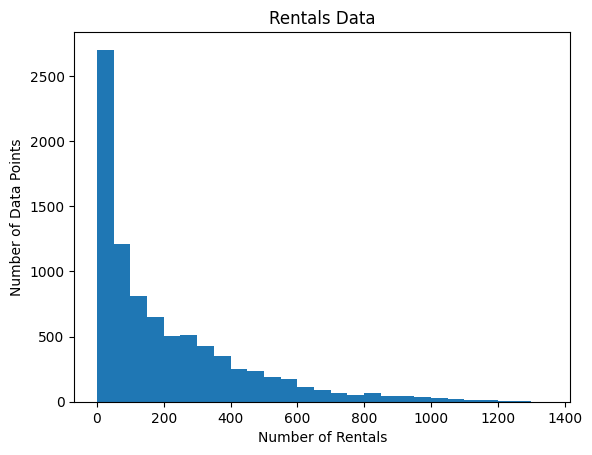

In [25]:
plt.hist(df["rentals"], bins=range(0, 1400, 50))
plt.title("Rentals Data")
plt.xlabel("Number of Rentals")
plt.ylabel("Number of Data Points")

The mean number of rental is ~205, with a standard deviation of 227.

In [26]:
print(
    "Average no. of Rentals: "
    + str(np.mean(df["rentals"]))
    + " Standard Dev: "
    + str(np.std(df["rentals"]))
)

Average no. of Rentals: 205.08578402882716 Standard Dev: 227.0392651748052


Next a histogram at a temp of 25F.

Text(0, 0.5, 'Number of Data Points')

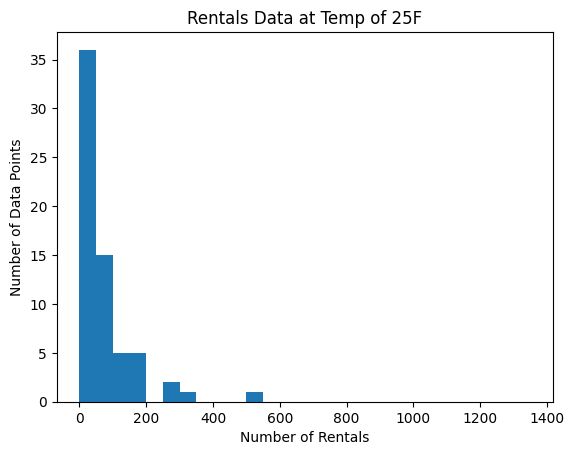

In [27]:
df_cold = df[df["temp"] == 25]
plt.hist(df_cold["rentals"], bins=range(0, 1400, 50))
plt.title("Rentals Data at Temp of 25F")
plt.xlabel("Number of Rentals")
plt.ylabel("Number of Data Points")

Standard deviation is now a lot smaller..

In [28]:
print(
    "Average no. of Rentals at 25F: "
    + str(np.mean(df_cold["rentals"]))
    + " Standard Dev: "
    + str(np.std(df_cold["rentals"]))
)

Average no. of Rentals at 25F: 72.55384615384615 Standard Dev: 90.4802623218041


A scatter plot of rentals across hour of rental shows that knowing the hour of rental could potentially reduce variability dramatically.

Text(0, 0.5, '# Rentals')

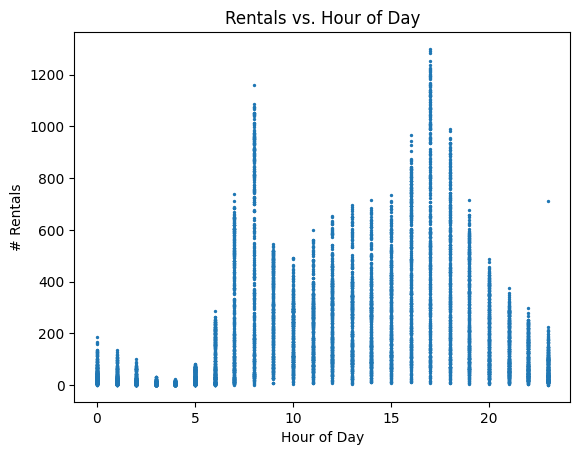

In [29]:
plt.scatter(df["hour"], df["rentals"], s=2)
plt.title("Rentals vs. Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("# Rentals")

Now lets take a look at rentals vs. temperature. We also look at the mean (or average) number of rentals and notice a definite straight-line like trend

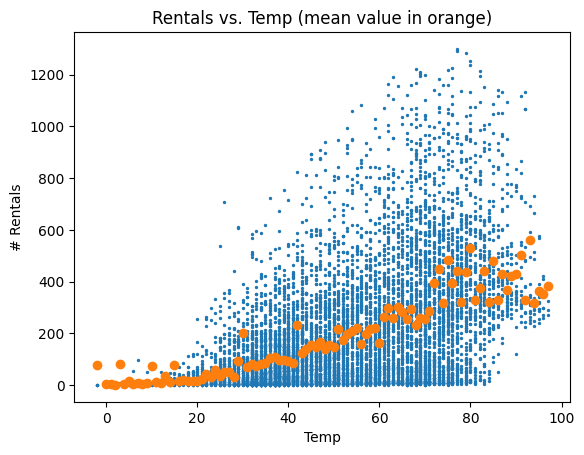

In [30]:
plt.scatter(df["temp"], df["rentals"], s=2)
plt.title("Rentals vs. Temp (mean value in orange)")
plt.xlabel("Temp")
plt.ylabel("# Rentals")
plt.scatter(df["temp"].unique(), df.groupby("temp")["rentals"].mean())

The above scatter plot is the key motivation for linear regression which we will turn to next. In particular, we will run a number of regressions of the type 'rentals' vs. some other independent variable (eg. temp) that we belive to have explanatory power.

In [31]:
est = ols(formula="rentals ~ temp", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     2641.
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        16:48:32   Log-Likelihood:                -57727.
No. Observations:                8603   AIC:                         1.155e+05
Df Residuals:                    8601   BIC:                         1.155e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -115.1099      6.588    -17.473      0.0

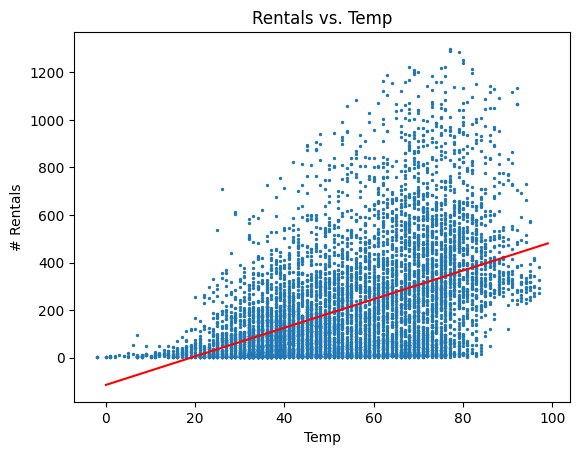

In [32]:
b0 = -115.1099
b1 = 6.0176

# Generate some example data
x = range(100)
y = [b0 + b1 * i for i in x]

plt.scatter(df["temp"], df["rentals"], s=2)
plt.title("Rentals vs. Temp")
plt.xlabel("Temp")
plt.ylabel("# Rentals")
plt.plot(x, y, color="red")

In [33]:
print(np.sqrt(est.mse_resid))

198.6078273046469


In [34]:
est = ols(formula="rentals ~ rel_humidity", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     249.5
Date:                Sun, 18 May 2025   Prob (F-statistic):           1.99e-55
Time:                        16:49:10   Log-Likelihood:                -58756.
No. Observations:                8603   AIC:                         1.175e+05
Df Residuals:                    8601   BIC:                         1.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      340.2762      8.892     38.266   

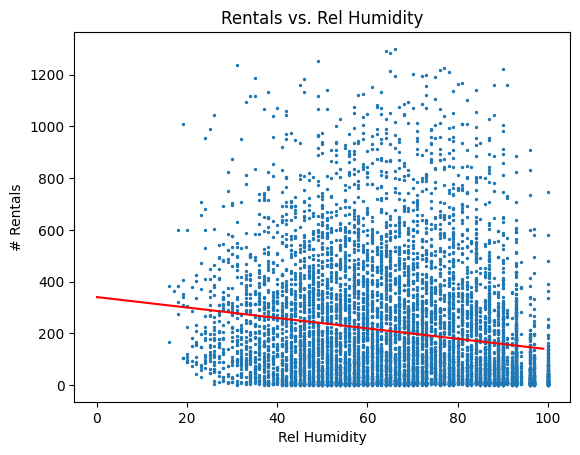

In [35]:
b0 = 340.2762
b1 = -2.0146

# Generate some example data
x = range(100)
y = [b0 + b1 * i for i in x]

plt.scatter(df["rel_humidity"], df["rentals"], s=2)
plt.title("Rentals vs. Rel Humidity")
plt.xlabel("Rel Humidity")
plt.ylabel("# Rentals")
plt.plot(x, y, color="red")

In [36]:
print(np.sqrt(est.mse_resid))

223.84213890754862


Text(0, 0.5, '# Rentals')

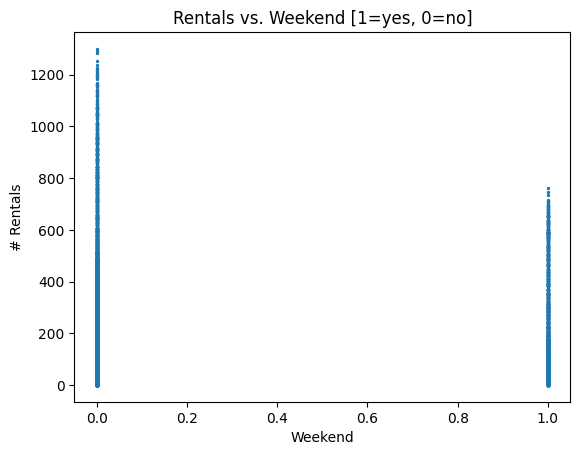

In [37]:
plt.scatter(df["weekend"], df["rentals"], s=2)
plt.title("Rentals vs. Weekend [1=yes, 0=no]")
plt.xlabel("Weekend")
plt.ylabel("# Rentals")

In [38]:
est = ols(formula="rentals ~ weekend", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sun, 18 May 2025   Prob (F-statistic):           2.42e-30
Time:                        16:50:01   Log-Likelihood:                -58814.
No. Observations:                8603   AIC:                         1.176e+05
Df Residuals:                    8601   BIC:                         1.176e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      222.8186      2.878     77.417   

Text(0, 0.5, '# Rentals')

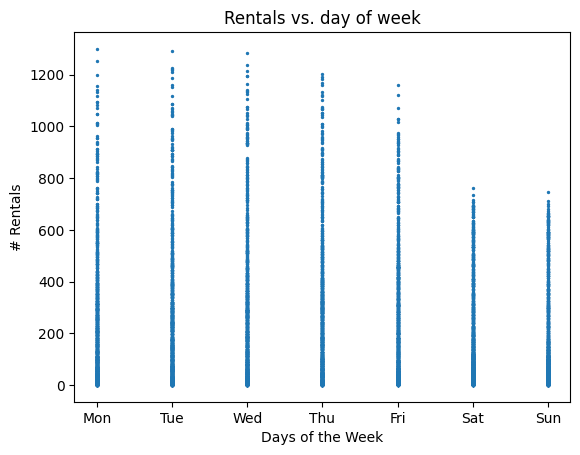

In [39]:
plt.scatter(df["day_of_week"], df["rentals"], s=2)
plt.title("Rentals vs. day of week")
plt.xlabel("Days of the Week")
plt.ylabel("# Rentals")

In [40]:
est = ols(formula="rentals ~ day_of_week", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     25.13
Date:                Sun, 18 May 2025   Prob (F-statistic):           9.94e-30
Time:                        16:50:17   Log-Likelihood:                -58805.
No. Observations:                8603   AIC:                         1.176e+05
Df Residuals:                    8596   BIC:                         1.177e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            225.2480      6

As a first step with multiple linear regression, we look for correlations between our independent variables. The reason is simple enough -- if two distinct variables are highly correlated, we may not want to include both. The reason for this is that it causes something called 'collinearity' which we will examine more carefully a bit later.

In [41]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,rentals,temp,temp_wb,rel_humidity,windspeed,precipitation
rentals,1.000000,0.484716,0.425792,-0.167903,-0.019345,-0.071619
temp,0.484716,1.000000,0.977801,0.126377,-0.148411,0.018469
temp_wb,0.425792,0.977801,1.000000,0.319822,-0.188347,0.057638
rel_humidity,-0.167903,0.126377,0.319822,1.000000,-0.218430,0.206801
windspeed,-0.019345,-0.148411,-0.188347,-0.218430,1.000000,0.069177
precipitation,-0.071619,0.018469,0.057638,0.206801,0.069177,1.000000


<Axes: >

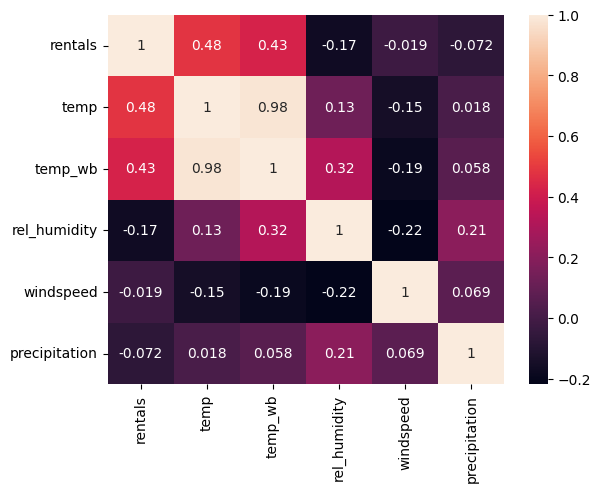

In [42]:
sns.heatmap(corr_matrix, annot=True)

In [43]:
est = ols(formula="rentals ~ temp + rel_humidity", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     1742.
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        16:51:45   Log-Likelihood:                -57416.
No. Observations:                8603   AIC:                         1.148e+05
Df Residuals:                    8600   BIC:                         1.149e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.9562      9.175      5.772   

What is the standard deviation of our residuals? Our best guess is the square root of the average squared residuals.

In [44]:
print(np.sqrt(est.mse_resid))

191.56676007313123


So if we decided to predict the number of rentals when the temp is 60F and the relative humidity is 50%, the point estimate is simply

In [45]:
print(
    "y_pred = 52.9562 + 6.3829*60 - 2.7942*50 = "
    + str(52.9562 + 6.3829 * 60 - 2.7942 * 50)
)

y_pred = 52.9562 + 6.3829*60 - 2.7942*50 = 296.2202


So, a probabilistic estimate will be well modeled as a Normal random variable with mean 296.22 and standard deviation 191.63. We can now answer a question like 'What is the chance that the number of rentals exceeds 400 when the temp is 60F and the relative humidity is 50%?'. The answer: the same as the probability that a Normal random variable with mean 296.22 and standard deviation 191.63 exceeds 400!

In [46]:
print(
    "Probability of at least 400 rentals at 60F with 50% humidity: "
    + str(1 - norm.cdf(400, loc=296.22, scale=191.63))
)

Probability of at least 400 rentals at 60F with 50% humidity: 0.2940592857195723


In [47]:
est.conf_int(alpha=0.05)

,0,1
Intercept,34.971280,70.941053
temp,6.159768,6.606104
rel_humidity,-3.009922,-2.578540


In [48]:
1 - norm.cdf(10, loc=8, scale=2)

np.float64(0.15865525393145707)

In [49]:
random_data = np.random.rand(len(df["rentals"]))
df["random"] = random_data
df.head(6)

,rentals,month,day,hour,day_of_week,weekend,temp,temp_wb,rel_humidity,windspeed,precipitation,random
0,4,1,1,0,Mon,0,2,0,59,16,0.0,0.064791
1,6,1,1,1,Mon,0,1,0,59,11,0.0,0.144366
2,6,1,1,2,Mon,0,1,-1,54,21,0.0,0.367953
3,1,1,1,5,Mon,0,0,-2,54,18,0.0,0.724437
4,3,1,1,6,Mon,0,0,-2,54,15,0.0,0.151816
5,3,1,1,7,Mon,0,0,-2,54,11,0.0,0.901812


In [50]:
df["rentals"].corr(df["random"])

np.float64(-0.003566719029223307)

Text(0, 0.5, '# Rentals')

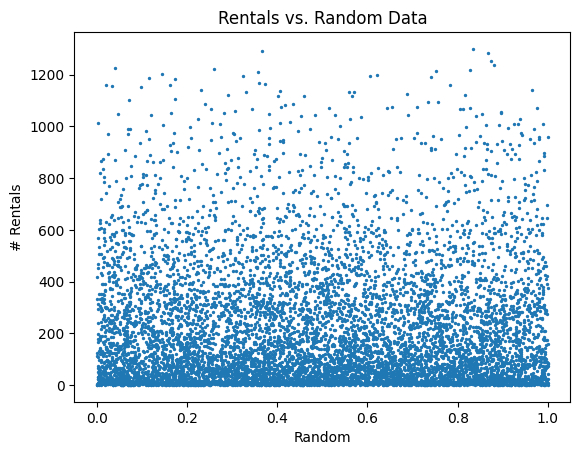

In [51]:
plt.scatter(df["random"], df["rentals"], s=2)
plt.title("Rentals vs. Random Data")
plt.xlabel("Random")
plt.ylabel("# Rentals")

In [52]:
est = ols(formula="rentals ~ temp + rel_humidity + random", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     1161.
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        16:54:42   Log-Likelihood:                -57416.
No. Observations:                8603   AIC:                         1.148e+05
Df Residuals:                    8599   BIC:                         1.149e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       53.3817      9.867      5.410   

In [53]:
est = ols(formula="rentals ~ temp + temp_wb", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     1738.
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        16:54:50   Log-Likelihood:                -57420.
No. Observations:                8603   AIC:                         1.148e+05
Df Residuals:                    8600   BIC:                         1.149e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.2405      6.359    -18.752      0.0

In [54]:
est = ols(
    formula="rentals ~ temp + rel_humidity + windspeed + precipitation", data=df
).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     876.1
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        16:54:57   Log-Likelihood:                -57409.
No. Observations:                8603   AIC:                         1.148e+05
Df Residuals:                    8598   BIC:                         1.149e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        40.8156     11.488      3.553

In [55]:
est = ols(formula="rentals ~ temp + rel_humidity + precipitation", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     1168.
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        16:55:03   Log-Likelihood:                -57410.
No. Observations:                8603   AIC:                         1.148e+05
Df Residuals:                    8599   BIC:                         1.149e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        48.6214      9.242      5.261

In [56]:
est = ols(formula="rentals ~ temp + temp_wb", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     1738.
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        16:55:12   Log-Likelihood:                -57420.
No. Observations:                8603   AIC:                         1.148e+05
Df Residuals:                    8600   BIC:                         1.149e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.2405      6.359    -18.752      0.0

In [57]:
print(np.sqrt(est.mse_resid))

191.6383021375479


Let's split our data into a training set (70% of the data) and a test set (the remaining 30%). We will use the train_test_split utlity we imported to accomplish this.

In [58]:
df_train, df_test = train_test_split(df, test_size=0.3)

Let's retrain a model on just the training data:

In [59]:
est_train = ols(
    formula="rentals ~ temp + rel_humidity + precipitation", data=df_train
).fit()
print(est_train.summary())

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     843.1
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        16:55:50   Log-Likelihood:                -40218.
No. Observations:                6022   AIC:                         8.044e+04
Df Residuals:                    6018   BIC:                         8.047e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        49.3205     11.047      4.464

How well does it do on the test data? Lets use the model we learned on the training data to predict rentals on the test data and then measure the OOS R^2

In [60]:
print(np.sqrt(est_train.mse_resid))

192.4637563274933


In [61]:
test_pred = est_train.predict(df_test)
print("OOS R-squared: " + str(r2_score(df_test["rentals"], test_pred)))

OOS R-squared: 0.27236571111267827


In [62]:
df_test.head()

,rentals,month,day,hour,day_of_week,weekend,temp,temp_wb,rel_humidity,windspeed,precipitation,random
595,6,1,28,6,Sun,1,47,46,93,14,0.0,0.466239
3968,105,6,20,23,Wed,0,70,63,66,7,0.0,0.520552
1774,150,3,21,7,Wed,0,35,32,72,22,0.0,0.621599
741,64,2,3,13,Sat,1,27,21,37,17,0.0,0.644899
8010,29,12,7,5,Fri,0,35,32,70,15,0.0,0.804495


In [63]:
r = 50.7752 + 6.4101 * (46) - 2.7708 * (56) - 246.8192 * (0.0)
r

190.475

In [64]:
test_pred.head()

595      95.296704
3968    319.533277
1774     75.921915
741     121.431156
8010     81.486274
dtype: float64

Text(0, 0.5, 'Predicted Rentals')

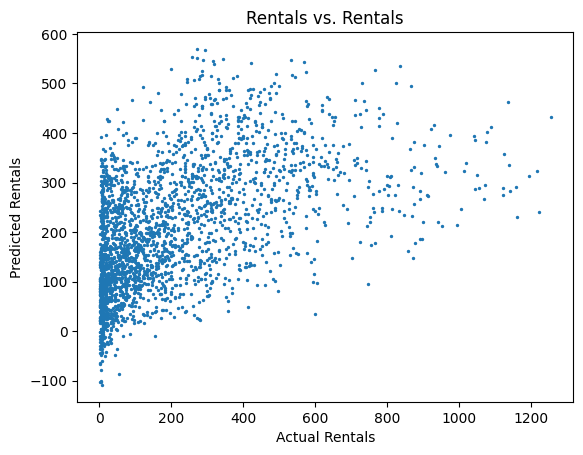

In [65]:
plt.scatter(df_test["rentals"], test_pred, s=2)
plt.title("Rentals vs. Rentals")
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")

### **Diabetes Dataset**

Lets load the publicly available diabetes dataset and print out a description of the dataset

In [66]:
diabetes = datasets.load_diabetes(as_frame=True)
diabetes_df = diabetes["frame"]

In [67]:
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Your task is to build the best linear regression model you can using this data to predict the 'target' field.

In [68]:
diabetes_df.head(6)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0


In [69]:
skim(diabetes_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 442    │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 11     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA  ┃ NA % ┃ mean       ┃ sd      ┃ p0       ┃ p25      ┃ p50       ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ age     │   0 │    0 │ -2.512e-19 │ 0.04762 │  -0.1072 │  -0.0373 │  0.005383 │ 0.03808 │  0.1107 │ ▂▅▆▇▆▁ │  │
│ │ sex     │   0 │    0 │  1.231e-17 │ 0.04762 │ -0.04464 │ -0.04464 │  -0.04464 │ 0.05068 │ 0.05068 │ ▇    ▇ │  │
│ │ bmi     │   0 │    0 │ -2.246e-16 │ 0.04762 │ -0.09028 │ -0.03423 │ -0.007284 │ 0.03125 │  0.1706 │ ▃▇▅▃▁  │  │
│ │ bp      │   0 │    0 │ -4.798e-17 │ 0.04762 │  -0.1124 │ -0.03666 │  -0.00567 │ 0.03564 │   0.132 │ ▁▆▇▅▃▁ │  │
│ │ s1      │   0 │    0 │ -1.381e-17 │ 0.04762 │  -0.1268 │ -0.03425 │ -0.004321 │ 0.02836 │  0.1539 │ ▁▅▇▅▂▁ │  │
│ │ s2      │   0 │    0 │  3.918e-17 │ 0.04762 │  -0.1156 │ -0.03036 │ -0.003819 │ 0.02984 │  0.1988 │ ▂▇▇▃▁  │  │
│ │ s3      │   0 │    0 │ -5.777e-18 │ 0.04762 │  -0.1023 │ -0.03512 │ -0.006584 │ 0.02931 │  0.1812 │ ▂▇▇▃▁  │  │
│ │ s4      │   0 │    0 │ -9.043e-18 │ 0.04762 │ -0.07639 │ -0.03949 │ -0.002592 │ 0.03431 │  0.1852 │ ▇▆▅▂▁  │  │
│ │ s5      │   0 │    0 │  9.294e-17 │ 0.04762 │  -0.1261 │ -0.03325 │ -0.001947 │ 0.03243 │  0.1336 │ ▁▅▇▇▃▁ │  │
│ │ s6      │   0 │    0 │   1.13e-17 │ 0.04762 │  -0.1378 │ -0.03318 │ -0.001078 │ 0.02792 │  0.1356 │ ▁▃▇▇▃▁ │  │
│ │ target  │   0 │    0 │      152.1 │   77.09 │       25 │       87 │     140.5 │   211.5 │     346 │ ▇▇▇▅▅▁ │  │
│ └─────────┴─────┴──────┴────────────┴─────────┴──────────┴──────────┴───────────┴─────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [70]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Text(0, 0.5, 'Number of Data Points')

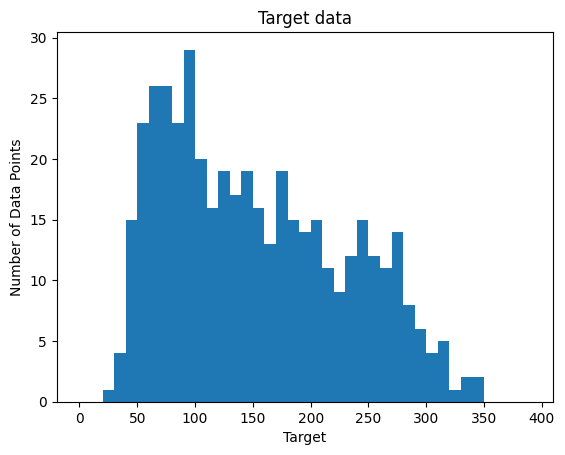

In [71]:
plt.hist(diabetes_df["target"], bins=range(0, 400, 10))
plt.title("Target data")
plt.xlabel("Target")
plt.ylabel("Number of Data Points")

In [72]:
print(
    "Average no. for Target: "
    + str(np.mean(diabetes_df["target"]))
    + " Standard Dev: "
    + str(np.std(diabetes_df["target"]))
)

Average no. for Target: 152.13348416289594 Standard Dev: 77.00574586945044


Text(0, 0.5, 'Target')

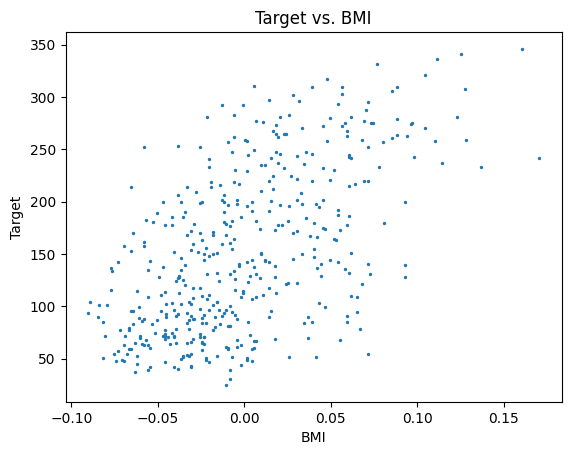

In [73]:
plt.scatter(diabetes_df["bmi"], diabetes_df["target"], s=2)
plt.title("Target vs. BMI")
plt.xlabel("BMI")
plt.ylabel("Target")

In [74]:
est = ols(formula="target ~ bmi", data=diabetes_df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sun, 18 May 2025   Prob (F-statistic):           3.47e-42
Time:                        16:58:51   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.0

In [75]:
print(np.sqrt(est.mse_resid))

62.51512200285265


Text(0, 0.5, 'Target')

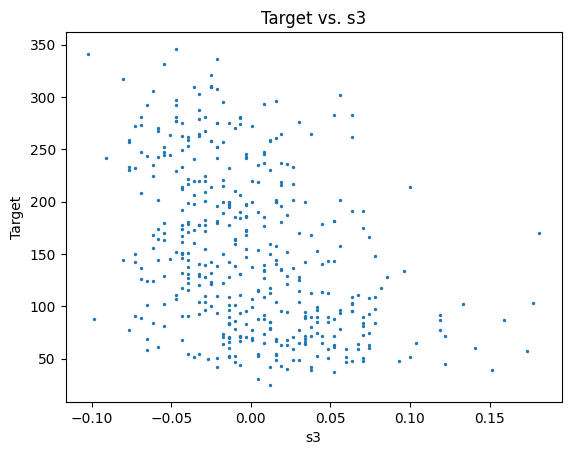

In [76]:
plt.scatter(diabetes_df["s3"], diabetes_df["target"], s=2)
plt.title("Target vs. s3")
plt.xlabel("s3")
plt.ylabel("Target")

In [77]:
est = ols(formula="target ~ s3", data=diabetes_df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     81.24
Date:                Sun, 18 May 2025   Prob (F-statistic):           6.16e-18
Time:                        16:59:10   Log-Likelihood:                -2509.7
No. Observations:                 442   AIC:                             5023.
Df Residuals:                     440   BIC:                             5032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      3.373     45.105      0.0

In [78]:
print(np.sqrt(est.mse_resid))

70.91131523302553


In [79]:
# Calculate correlation matrix
correlation_matrix = diabetes_df.corr(numeric_only=True)
correlation_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

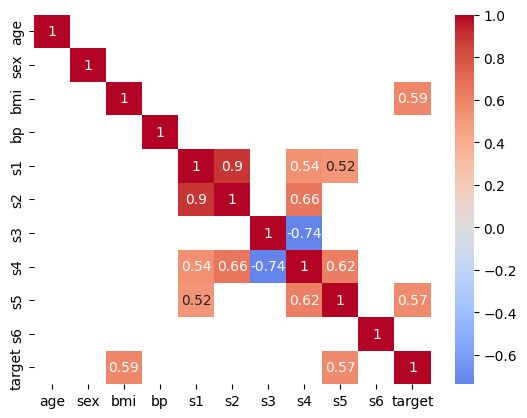

In [80]:
# Create a mask for correlations less than 0.5
mask = np.abs(correlation_matrix) < 0.5

sns.heatmap(diabetes_df.corr(), annot=True, mask=mask, cmap="coolwarm", center=0)

Text(0, 0.5, 'Target')

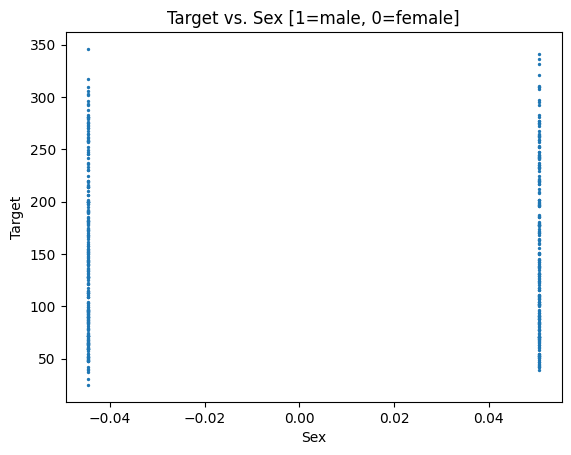

In [81]:
plt.scatter(diabetes_df["sex"], diabetes_df["target"], s=2)
plt.title("Target vs. Sex [1=male, 0=female]")
plt.xlabel("Sex")
plt.ylabel("Target")

In [82]:
est = ols(formula="target ~ sex", data=diabetes_df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8174
Date:                Sun, 18 May 2025   Prob (F-statistic):              0.366
Time:                        16:59:44   Log-Likelihood:                -2546.8
No. Observations:                 442   AIC:                             5098.
Df Residuals:                     440   BIC:                             5106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      3.668     41.479      0.0

In [83]:
print(np.sqrt(est.mse_resid))

77.10896796118259


In [84]:
est = ols(formula="target ~ age", data=diabetes_df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.10
Date:                Sun, 18 May 2025   Prob (F-statistic):           7.06e-05
Time:                        16:59:59   Log-Likelihood:                -2539.2
No. Observations:                 442   AIC:                             5082.
Df Residuals:                     440   BIC:                             5091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      3.606     42.192      0.0

In [85]:
print(np.sqrt(est.mse_resid))

75.80599912703144


In [86]:
est = ols(
    formula="target ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5", data=diabetes_df
).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     51.29
Date:                Sun, 18 May 2025   Prob (F-statistic):           8.68e-63
Time:                        17:00:13   Log-Likelihood:                -2386.5
No. Observations:                 442   AIC:                             4793.
Df Residuals:                     432   BIC:                             4834.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.058      0.0

In [87]:
est = ols(formula="target ~ sex + bmi + bp + s5", data=diabetes_df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sun, 18 May 2025   Prob (F-statistic):           5.42e-62
Time:                        17:00:23   Log-Likelihood:                -2399.8
No. Observations:                 442   AIC:                             4810.
Df Residuals:                     437   BIC:                             4830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.639     57.648      0.0

In [88]:
est = ols(formula="target ~ bmi + s5", data=diabetes_df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 18 May 2025   Prob (F-statistic):           2.25e-59
Time:                        17:00:35   Log-Likelihood:                -2411.2
No. Observations:                 442   AIC:                             4828.
Df Residuals:                     439   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.702     56.303      0.0

In [89]:
print(np.sqrt(est.mse_resid))

56.807512054914135


In [90]:
df_train, df_test = train_test_split(diabetes_df, test_size=0.3)

In [91]:
est_train = ols(formula="target ~ sex + bmi + bp + s5", data=df_train).fit()
print(est_train.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     70.98
Date:                Sun, 18 May 2025   Prob (F-statistic):           2.14e-42
Time:                        17:01:06   Log-Likelihood:                -1677.5
No. Observations:                 309   AIC:                             3365.
Df Residuals:                     304   BIC:                             3384.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.2473      3.169     48.040      0.0

In [92]:
print(np.sqrt(est_train.mse_resid))

55.58467333439272


In [93]:
test_pred = est_train.predict(df_test)
print("OOS R-squared: " + str(r2_score(df_test["target"], test_pred)))

OOS R-squared: 0.4884507706169847


In [94]:
df_test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
189,-0.001882,-0.044642,-0.066563,0.001215,-0.002945,0.003070,0.011824,-0.002592,-0.020292,-0.025930,79.0
37,-0.009147,-0.044642,0.011039,-0.057313,-0.024960,-0.042963,0.030232,-0.039493,0.017036,-0.005220,276.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064,208.0
77,-0.096328,-0.044642,-0.036385,-0.074527,-0.038720,-0.027618,0.015505,-0.039493,-0.074093,-0.001078,200.0


In [95]:
test_pred.head()

189    109.857331
37     157.113898
4      127.478307
225    215.070221
77      71.578589
dtype: float64

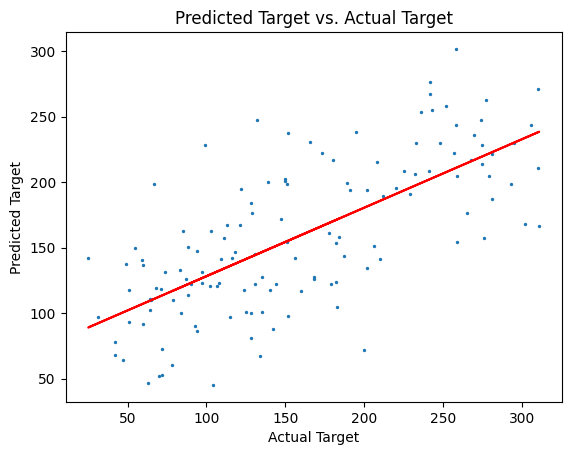

In [96]:
x = df_test["target"]
y = test_pred

plt.scatter(x, y, s=2)
plt.title("Predicted Target vs. Actual Target")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")

# Calculate linear regression line
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept  # y-values of the regression line

# Plot the regression line
plt.plot(x, y_pred, color="red", label=f"Line: y = {intercept:.2f} + {slope:.2f}x")